In [6]:
from __future__ import print_function
import librosa
import librosa.display
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
from PIL import Image
import torch
import torchaudio
import torchvision
from audio_records import EpicAudioRecord
from SpecAugment import spec_augment_pytorch
from torch.utils.data.dataset import Dataset
from torch.utils.data import DataLoader
import torchvision.models as models
from torchvision import transforms
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import PIL
import os
import h5py
import IPython.display as ipd
import pickle
%matplotlib inline

In [2]:
def make_spec(audio_array, window_size, step_size, spec_type='stft'):    
    nperseg = int(round(window_size * 24000 / 1e3))
    noverlap = int(round(step_size * 24000/ 1e3))

    if spec_type == 'stft':
        fft_windows = librosa.stft(audio_array, n_fft=2048, hop_length=noverlap, win_length = nperseg)
        ft_dB = librosa.amplitude_to_db(fft_windows, ref=np.max)
        return ft_dB   
            
    fft_windows = librosa.stft(audio_array, n_fft=2048, hop_length=noverlap, win_length = nperseg)
    magnitude = np.abs(fft_windows)#**2
    mel = librosa.filters.mel(sr=24000, n_fft=2048, n_mels=128)
    mel = mel.dot(magnitude)
    spec = librosa.power_to_db(mel, ref=np.max)
    return spec

def trim(record, audio_files):
    start = record.start_timestamp
    end = record.stop_timestamp

    start = datetime.datetime.strptime(start, "%H:%M:%S.%f")
    end = datetime.datetime.strptime(end, "%H:%M:%S.%f")

    end_timedelta = end - datetime.datetime(1900, 1, 1)
    start_timedelta = start - datetime.datetime(1900, 1, 1)

    end_seconds = end_timedelta.total_seconds()
    start_seconds = start_timedelta.total_seconds()

    start_sample = int(np.floor(start_seconds * 24000))
    end_sample = int(np.ceil(end_seconds * 24000))


    data_point = np.array(audio_files[record.untrimmed_video_name])
    data_point = data_point[start_sample:end_sample]
    return data_point

In [3]:
audio_files = os.getcwd() + '/../scratch/EPIC/EPIC_audio.hdf5'
train_path = os.getcwd() + '/../scratch/EPIC/epic-kitchens-100-annotations/EPIC_100_train.pkl'
h5 = h5py.File(audio_files, 'r')
with open(train_path, 'rb') as f:
            data = pickle.load(f)
            data = [EpicAudioRecord(tup) for tup in data.iterrows()]

turn on light
(128, 361)


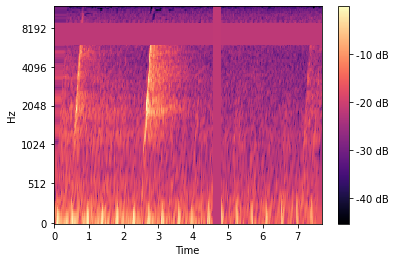

In [13]:
data_point = trim(data[1], h5)
spec = torch.Tensor(make_spec(data_point, 10, 5, 'mel'))

spec = np.array(spec_augment_pytorch.spec_augment(spec, 20, 20, 20, 1, 1) ).squeeze()

ipd.display(ipd.Audio(data_point, rate=24000))
print(data[1].narration)
print(np.shape(spec))
librosa.display.specshow(spec, sr=24000, x_axis='time', y_axis='mel');
plt.colorbar(format='%+2.0f dB');
plt.show() 

open door
(128, 324)


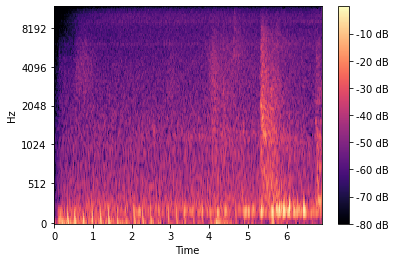

turn on light
(128, 181)


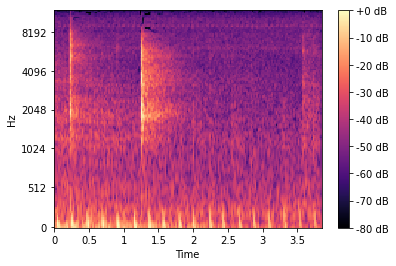

KeyboardInterrupt: Interrupted by user

In [5]:
for record in data:
    data_point = trim(record, h5)
    spec = make_spec(data_point, 20, 10)
    
    ipd.display(ipd.Audio(data_point, rate=24000))
    print(record.narration)
    print(np.shape(spec))
    librosa.display.specshow(spec, sr=24000, x_axis='time', y_axis='mel');
    plt.colorbar(format='%+2.0f dB');
    plt.show() 
    input()

In [14]:
f2 = h5py.File('epic_subset.hdf5', 'w')
h5.copy('P01_01', f2)
h5.copy('P01_02', f2)
h5.copy('P01_03', f2)
h5.copy('P01_04', f2)
h5.copy('P01_05', f2)
h5.copy('P01_06', f2)
h5.copy('P01_07', f2)
h5.copy('P01_08', f2)
h5.copy('P01_09', f2)
h5.copy('P01_10', f2)
f2.close()

In [15]:
h5 = h5py.File('epic_subset.hdf5', 'r')
h5.keys()

<KeysViewHDF5 ['P01_01', 'P01_02', 'P01_03', 'P01_04', 'P01_05', 'P01_06', 'P01_07', 'P01_08', 'P01_09', 'P01_10']>